<a href="https://colab.research.google.com/github/bethdfuller/Capstone/blob/main/BFC964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Link Data, Import Libraries and Load Data

Import: 

*   Pandas 
*   Matplotlib


Link 

*   Aviation Data set from Kaggle, stored in Github



In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
from scipy import stats

from sklearn.linear_model import LinearRegression , LogisticRegression
lm = LinearRegression()

url = 'https://raw.githubusercontent.com/bethdfuller/Capstone/main/AviationData.csv'



*   Read CSV File
*   Print Head of Data



In [29]:
dfAviation = pd.read_csv(url, encoding = 'ISO-8859-1',low_memory=False)

In [30]:
dfAviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Data Clean




*   Separate Location into City & State
*   Separate Date, Drop Dates before 1982
*   Filter Alaska Data



In [17]:
dfAviation['City'] = dfAviation['Location'].str.split(',').str[0]
dfAviation['State'] = dfAviation['Location'].str.split(',').str[1]

In [18]:
dfAviation['Event.Date'] = pd.to_datetime(dfAviation['Event.Date'])
dfAviation['Year'] = dfAviation['Event.Date'].apply(lambda time: time.year)
dfAviation['Month'] = dfAviation['Event.Date'].apply(lambda time: time.month)

dfAviation = dfAviation[dfAviation['Year'] >= 1982]



*   Filter United States
*   Filter Accidents
*   List item
*   List item


In [19]:
dfAviation = dfAviation[dfAviation['Country']=='United States']


In [20]:
dfAviation = dfAviation[dfAviation['Investigation.Type']=='Accident']

Filter States for Alaska Data

In [21]:
akAviation = dfAviation[dfAviation['State'].str.contains('AK', na = False)]
akAviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,State,Year,Month
17,20020917X01656,Accident,ANC82FAG14,1982-01-02,"SKWENTA, AK",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,VMC,Unknown,Probable Cause,02-01-1983,SKWENTA,AK,1982,1
44,20020917X01651,Accident,ANC82FA012,1982-01-05,"BETHEL, AK",United States,NaN,NaN,BET,BETHEL,...,0.0,0.0,VMC,Takeoff,Probable Cause,05-01-1983,BETHEL,AK,1982,1
74,20020917X01623,Accident,ANC82DA013,1982-01-10,"QUINHAGAK, AK",United States,NaN,NaN,NaN,NaN,...,3.0,0.0,VMC,Cruise,Probable Cause,10-01-1983,QUINHAGAK,AK,1982,1
95,20020917X01625,Accident,ANC82DA015,1982-01-15,"NEAR NUIQSUT, AK",United States,NaN,NaN,NaN,NaN,...,0.0,4.0,VMC,Landing,Probable Cause,15-01-1983,NEAR NUIQSUT,AK,1982,1
105,20020917X01624,Accident,ANC82DA014,1982-01-17,"ANCHORAGE, AK",United States,NaN,NaN,MRI,MERRILL FIELD,...,1.0,1.0,VMC,Takeoff,Probable Cause,17-01-1983,ANCHORAGE,AK,1982,1


In [22]:
akAviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5449 entries, 17 to 87232
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                5449 non-null   object        
 1   Investigation.Type      5449 non-null   object        
 2   Accident.Number         5449 non-null   object        
 3   Event.Date              5449 non-null   datetime64[ns]
 4   Location                5449 non-null   object        
 5   Country                 5449 non-null   object        
 6   Latitude                2091 non-null   object        
 7   Longitude               2091 non-null   object        
 8   Airport.Code            2026 non-null   object        
 9   Airport.Name            2324 non-null   object        
 10  Injury.Severity         5448 non-null   object        
 11  Aircraft.damage         5420 non-null   object        
 12  Aircraft.Category       1652 non-null   object

Drop Irrelevant Columns: Event ID, Accident Number, Country, Airport Name, Registration Number, Schedule, Report Status, Publication Date



Clean Data

In [23]:
akAviation.drop(['Event.Id', 'Location', 'Airport.Name', 'Registration.Number',
                 'Schedule', 'Report.Status', 'Publication.Date'], axis=1)

,Investigation.Type,Accident.Number,Event.Date,Country,Latitude,Longitude,Airport.Code,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,City,State,Year,Month
17,Accident,ANC82FAG14,1982-01-02,United States,NaN,NaN,NaN,Fatal(3),Destroyed,Airplane,...,3.0,0.0,0.0,0.0,VMC,Unknown,SKWENTA,AK,1982,1
44,Accident,ANC82FA012,1982-01-05,United States,NaN,NaN,BET,Non-Fatal,Substantial,Airplane,...,0.0,2.0,0.0,0.0,VMC,Takeoff,BETHEL,AK,1982,1
74,Accident,ANC82DA013,1982-01-10,United States,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,...,0.0,0.0,3.0,0.0,VMC,Cruise,QUINHAGAK,AK,1982,1
95,Accident,ANC82DA015,1982-01-15,United States,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,...,0.0,0.0,0.0,4.0,VMC,Landing,NEAR NUIQSUT,AK,1982,1
105,Accident,ANC82DA014,1982-01-17,United States,NaN,NaN,MRI,Non-Fatal,Destroyed,Airplane,...,0.0,0.0,1.0,1.0,VMC,Takeoff,ANCHORAGE,AK,1982,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87150,Accident,ANC22LA006,2021-11-09,United States,065181N,0014380W,L20,Non-Fatal,Substantial,Airplane,...,0.0,0.0,0.0,1.0,VMC,NaN,Yukon Charlie River,AK,2021,11
87200,Accident,ANC22LA007,2021-11-21,United States,604645N,1615012W,BET,Non-Fatal,Substantial,Airplane,...,0.0,0.0,0.0,6.0,VMC,NaN,Bethel,AK,2021,11
87216,Accident,ANC22LA008,2021-11-26,United States,NaN,NaN,NaN,Non-Fatal,NaN,NaN,...,0.0,1.0,0.0,0.0,NaN,NaN,Palmer,AK,2021,11
87224,Accident,ANC22LA010,2021-11-29,United States,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,Nikiski,AK,2021,11


# Analysis

# Search: Accident Number

*   Search database with an Accident Number.
*   Example Accident Number: ANC82FAG14

In [ ]:
inputAccidentNumber = input("Input Accident Number: ")
print(akAviation.loc[akAviation['Accident.Number']==inputAccidentNumber])


Input Accident Number: ANC82FAG14
          Event.Id Investigation.Type Accident.Number Event.Date     Location  \
17  20020917X01656           Accident      ANC82FAG14 1982-01-02  SKWENTA, AK   

          Country Latitude Longitude Airport.Code Airport.Name  ...  \
17  United States      NaN       NaN          NaN          NaN  ...   

   Total.Minor.Injuries Total.Uninjured Weather.Condition  \
17                  0.0             0.0               VMC   

   Broad.phase.of.flight   Report.Status Publication.Date     City  State  \
17               Unknown  Probable Cause       02-01-1983  SKWENTA     AK   

    Year Month  
17  1982     1  

[1 rows x 35 columns]


# Plot: Aviation Accidents by Year

Aviation Accients by Year: United States

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


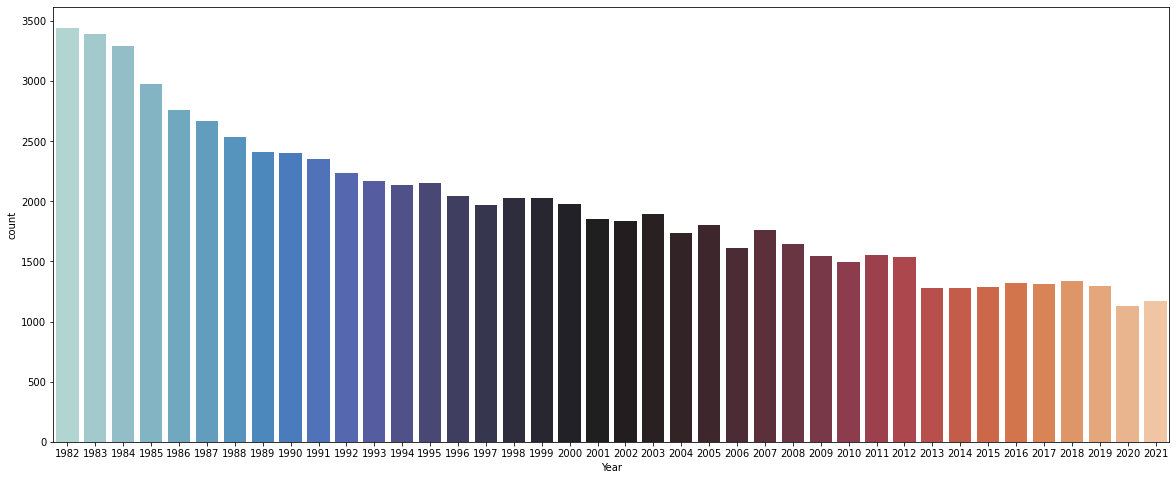

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(dfAviation['Year'], palette = 'icefire')

Aviation Accidents by Year: Alaska 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


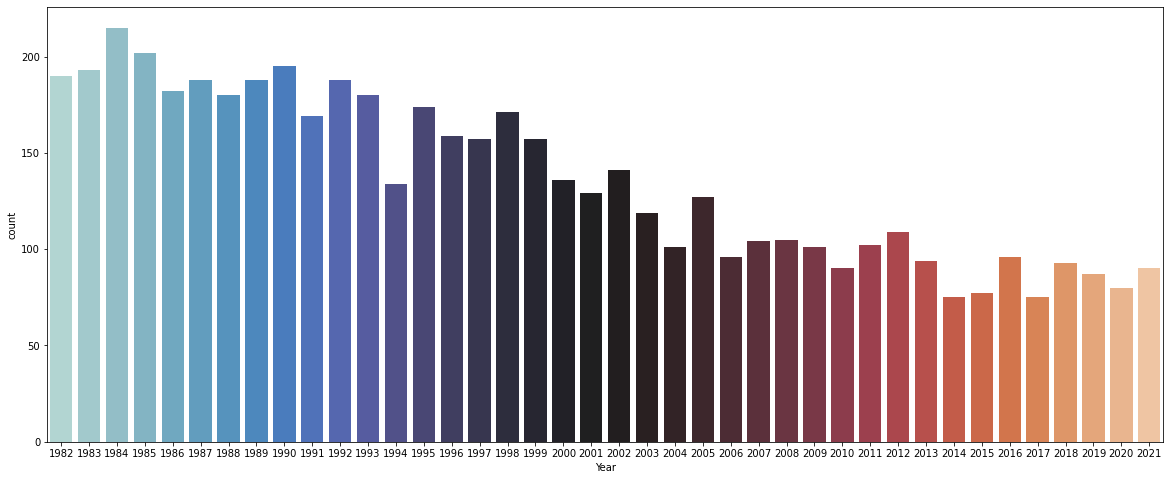

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(akAviation['Year'], palette = 'icefire')

# Plot: Aviation Accidents by Month

Aviation Accidents by Month: United States

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


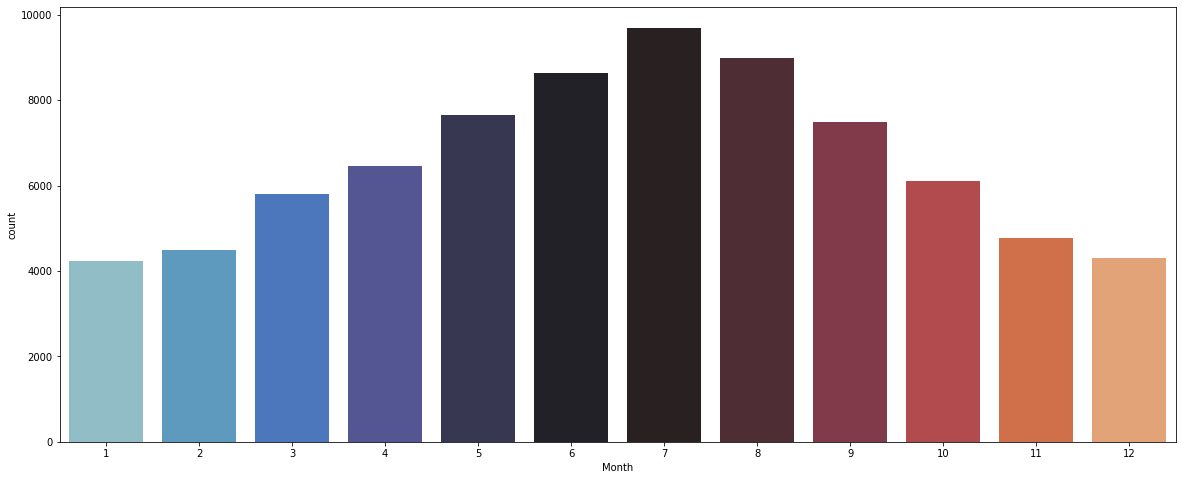

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(dfAviation['Month'], palette = 'icefire')

Aviation Accidents by Month: Alaska 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


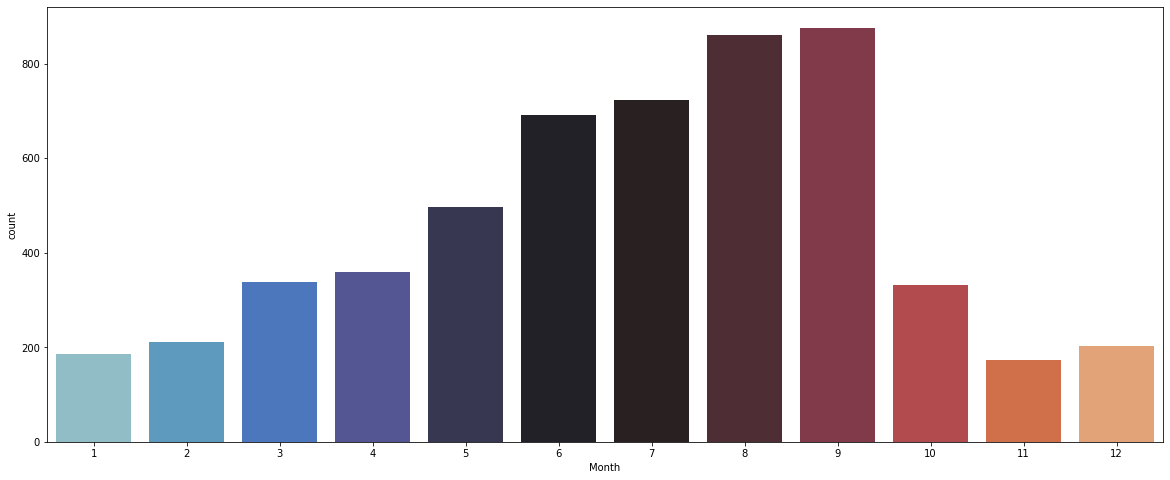

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(akAviation['Month'], palette = 'icefire')

# Plot: Phase of Flight

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


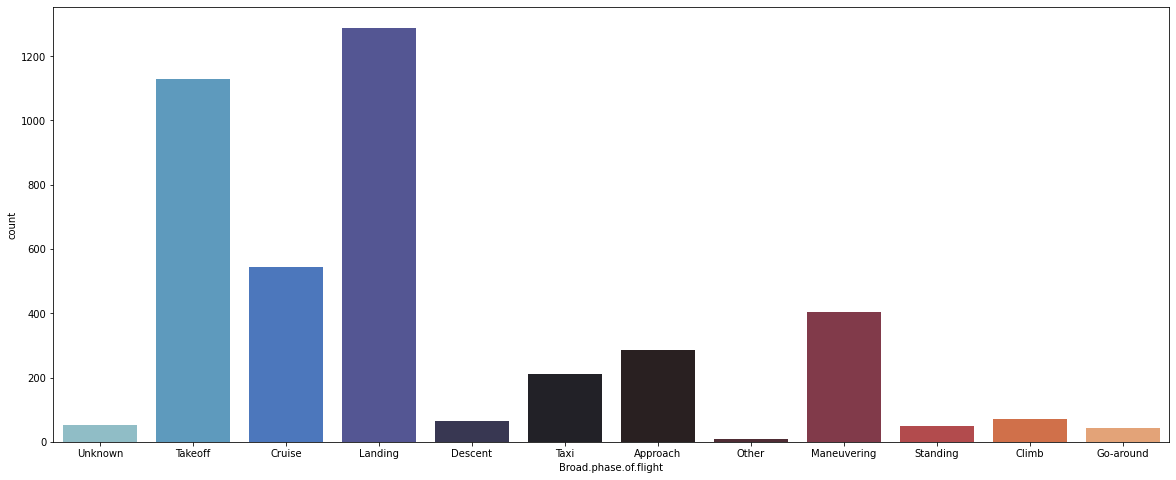

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(akAviation['Broad.phase.of.flight'], palette = 'icefire')

# Plot: Weather Condition

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


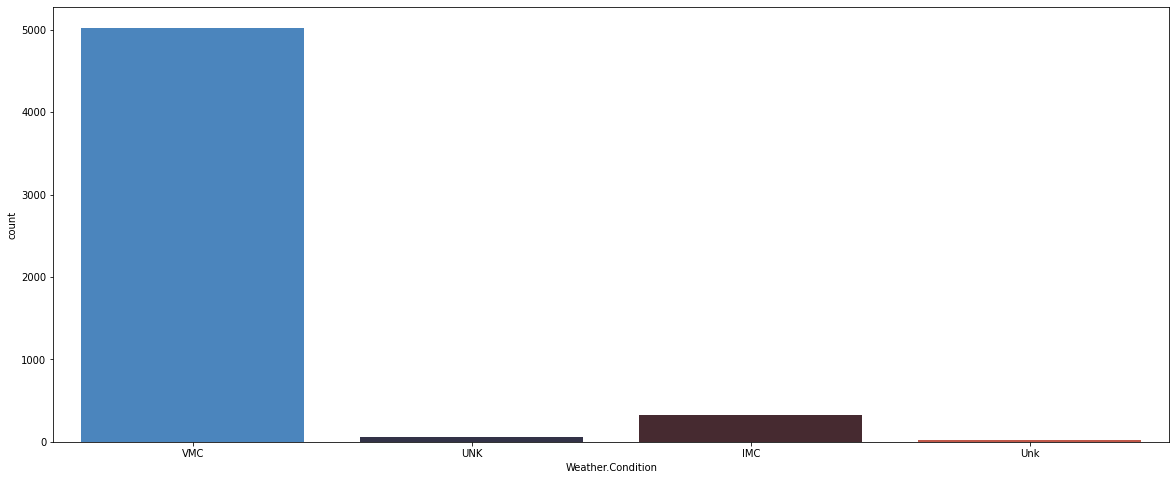

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(akAviation['Weather.Condition'], palette = 'icefire')

# Plot: Aircraft Make

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



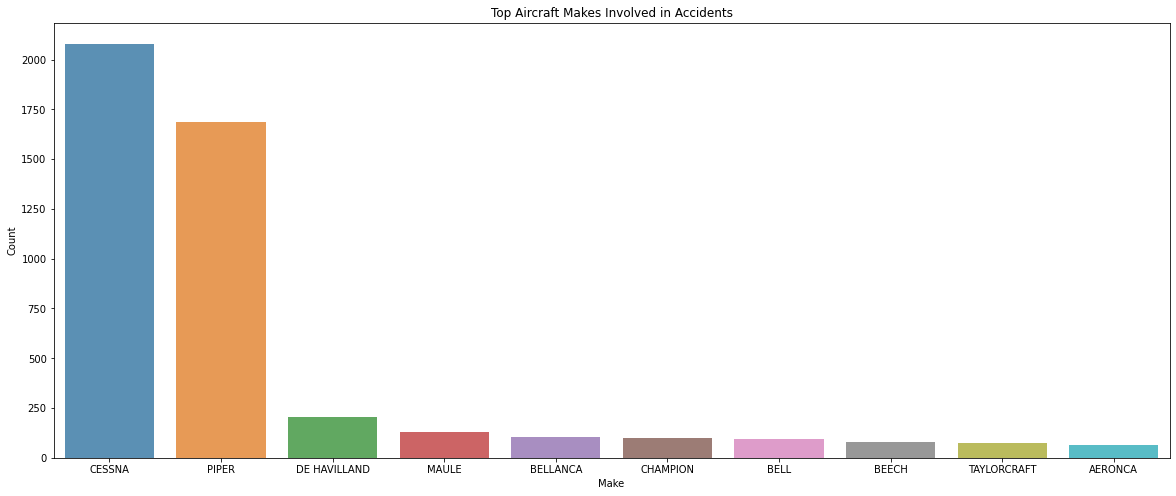

In [ ]:
make_count = akAviation['Make'].str.upper().value_counts()
make_count = make_count[:10]
plt.figure(figsize=(20,8))
sns.barplot(make_count.index, make_count.values, alpha=0.8)
plt.title('Top Aircraft Makes Involved in Accidents')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

# Interactive Map: Alaska Accidents

In [ ]:
akAviation['text'] = 'Accident Number: ' + (akAviation['Accident.Number'].astype(str)) + '<br>Fatalities: ' + (akAviation['Total.Fatal.Injuries'].astype(str))
limits = [(0,100)]
accidentState = []

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    Injuries_Count = akAviation[((akAviation['Total.Fatal.Injuries'] > lim[0]) & (akAviation['Total.Fatal.Injuries'] <lim[1]))]
    fig.add_trace(go.Scattergeo(
        lon = Injuries_Count['Longitude'],
        lat = Injuries_Count['Latitude'],
        opacity = 1,
        text = Injuries_Count['text'],
        marker = dict(
            size = Injuries_Count['Total.Fatal.Injuries'],
            line_color='darkred',
            line_width= 2,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))
    accidentState.append(Injuries_Count)

fig.update_geos(
    resolution=50, 
    fitbounds="locations", 
    showland=True, landcolor="darkkhaki", 
    showocean=True, oceancolor="lightseagreen",
    showlakes=True, lakecolor="darkblue", 
    showrivers=True, rivercolor="mediumblue")
fig.update_layout(
        title_text = 'Fatal Injuries in Alaska',
        geo = dict(
            scope = 'usa',
        )
        

    )
fig.show()

<ipython-input-32-e3bd27bc996d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  akAviation['text'] = 'Accident Number: ' + (akAviation['Accident.Number'].astype(str)) + '<br>Fatalities: ' + (akAviation['Total.Fatal.Injuries'].astype(str))


# Machine Learning: Linear Regression

Accident predictions for the next 7 years:
2022: 67
2023: 63
2024: 60
2025: 56
2026: 53
2027: 49
2028: 46


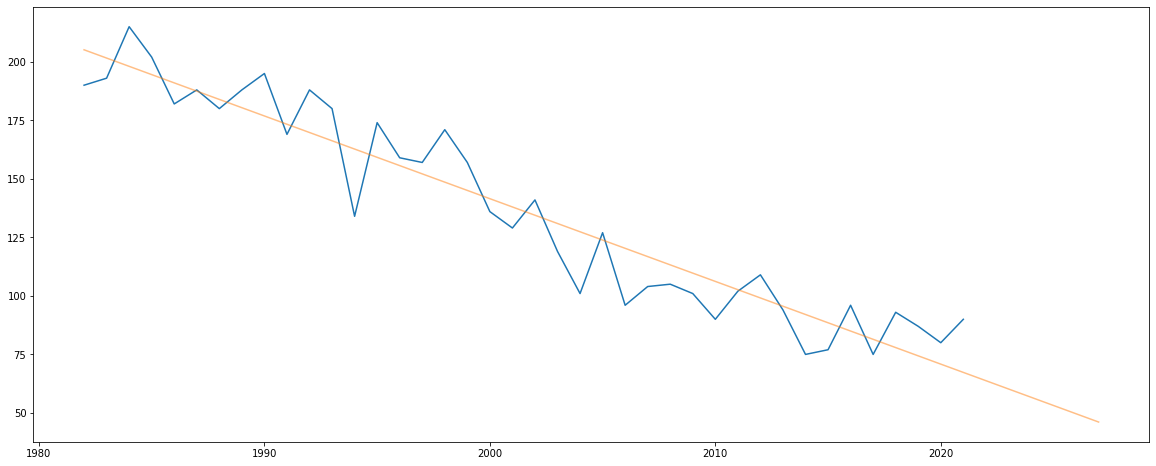

In [33]:
from textwrap import indent
#Count of accidents by year 
yearAKAccident = pd.DataFrame(akAviation.groupby('Year').count())
yearAKAccident = yearAKAccident.drop(columns=['Event.Date'])
yearAKAccident = yearAKAccident.rename(columns={'Month': 'YearCount'})
yearAKAccident.head()

X=[[y] for y in yearAKAccident.index.values]
y=[[e] for e in yearAKAccident['YearCount']]

lm.fit(X,y)

predictAccidentAK_X=[[y] for y in range (1982, 2028)]
predictAccidentAK=lm.predict(predictAccidentAK_X)

f, axes = plt.subplots(1,1, figsize=(20,8))
plt.plot(X,y)
plt.plot(predictAccidentAK_X, predictAccidentAK, alpha = 0.5)

#Predict next 7 years of accidents 

print('Accident predictions for the next 7 years:')
for i in range (0,7):
  year=2022+i
  n=-7+i
  print('%d: %d' % (year, predictAccidentAK[n]))


# Machine Learning: Random Forest 